# Zomato Data Analysis 
![Alt text](https://play-lh.googleusercontent.com/ixPkPHkzd8VD0HbmCL1n5PKYi3tWn8hGpRjeP6lutuFWZ6VpXUePGa9ZHcP6f_99bDA=s256-rw)


Zomato serves an average of 17.5 million monthly transacting customers on its food delivery platform. The number of monthly active restaurant partners has also seen an 8.7% year-on-year increase, rising from 208,000 to 226,000.

I am working with a comprehensive customer dataset to derive meaningful insights that can drive business decisions. 

This project involves:

- Performing Exploratory Data Analysis (EDA) to understand customer behavior, ordering patterns, and trends.

- Creating visualizations to uncover hidden patterns, seasonality, and geographic insights.

- Addressing specific business questions related to customer segmentation, churn behavior, restaurant performance, and delivery dynamics.

The goal is to generate actionable insights that support strategic decisions in improving customer engagement, optimizing restaurant partner performance, and enhancing delivery efficiency.


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

### Importing data and creating dataframe

In [2]:
df = pd.read_csv("Zomato data .csv")

In [3]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
df.shape

(148, 7)

In [5]:
df.size

1036

In [6]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [7]:
df.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [9]:
df.describe

<bound method NDFrame.describe of                       name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffe

#### Finding if there are any duplicates

In [10]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [11]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
143    False
144    False
145    False
146    False
147    False
Length: 148, dtype: bool

In [12]:
df[df.duplicated()]

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)


#### There are no duplicate values in the dataset

#### Checking for null values

In [13]:
df.isnull()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
143,False,False,False,False,False,False,False
144,False,False,False,False,False,False,False
145,False,False,False,False,False,False,False
146,False,False,False,False,False,False,False


In [14]:
df[df.isnull()]

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

#### No null values present

#### Converting the datatype of column - Rate

In [16]:
def handlerates(rate):
    value = str(rate).split('/')  # use 'rate', not 'value'
    value = value[0]
    return float(value)

df['rate'] = df['rate'].apply(handlerates)
print(df.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


#### Type of Resturant 

In [17]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Type of resturant')

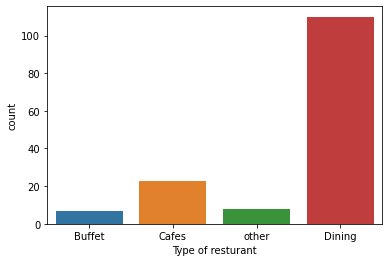

In [18]:
sns.countplot(x= df['listed_in(type)'])
plt.xlabel("Type of resturant")

#### Conclusion: Majority of the resturant falls in Dining 

#### How many votes has each type of restaurant recevied from customers? 

In [19]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [20]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()

In [25]:
results = pd.DataFrame({'votes': grouped_data})

In [26]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


##### Using line graph 

Text(0, 0.5, 'Votes')

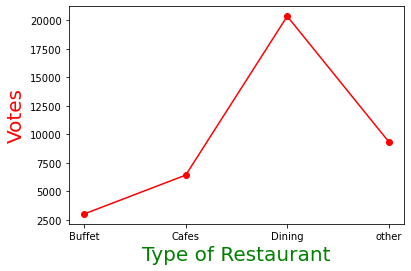

In [ ]:
plt.plot(results, c= 'red', marker = "o")
plt.xlabel("Type of Restaurant", c="green", size = 20)
plt.ylabel('Votes',c="red", size = 20)

#### Conclusion - Dining restaurants has recieved maximum votes

#### What are the ratings that the majority of the restaurants have received ?

In [29]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [31]:
df['rate'].max()

4.6

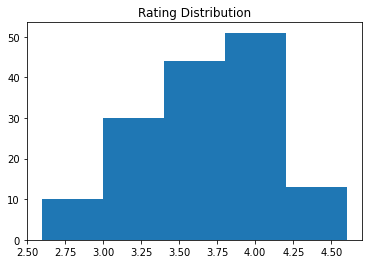

In [32]:
plt.hist(df['rate'], bins = 5)
plt.title("Rating Distribution")
plt.show()

##### Conclusion - The Majority of the restaurants are from 3.5 to 4

##### Zomato has observed that most couples order their food online. What is their average spending on each other ?

##### Average order spending by couples

In [33]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='count'>

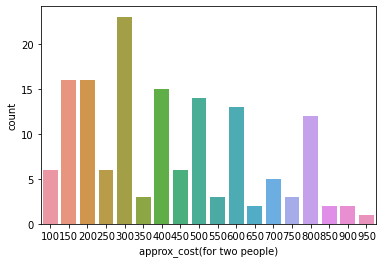

In [34]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x= couple_data)

##### Conlusion - The majority of the couples prefer restaurants with an approximate cost of 300 rupees.

#### Which mode (online or offline) has received the maximum rating ?


In [35]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<AxesSubplot:xlabel='online_order', ylabel='rate'>

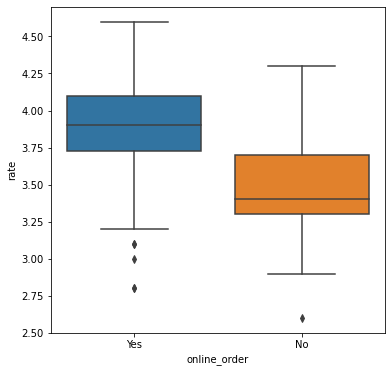

In [37]:
plt.figure(figsize=(6,6))
sns.boxplot(x = 'online_order', y='rate', data = df)

##### Conclusion - Offline Order recevied lower rating in comparison to online order 

#### Which type of restaurant received more offline orders, so that Zomato can provide customers some good offers 

In [38]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


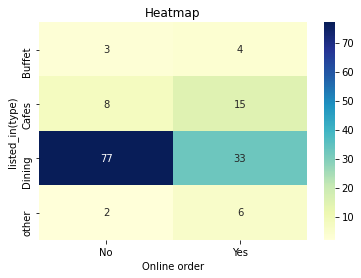

In [40]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Heatmap")
plt.xlabel("Online order")
plt.ylabel("listed_in(type)")
plt.show()

##### Conlcusion - Dinning restaurants primarily accept offline orders, whereas cafe primarily receive online orders. This suggests that cilent prefer orders in person at restaurants, but prefer online ordering at cafes.